# Firm Entry and Exit - Week 4 - OSE Lab
## Thomas Pellet
### 07/2019

## Question 1: Define a Recursive Equilibrium

As in Khan & Thomas (2009), it is possible to define a recursive equilibrium for the model. This equilibrium consists of four conditions:
* Firms maximize their value given households preferences (Stochastic discount factor pricing contingent claims). In other words, we have that
<p align="center">
$\frac{1}{1+r} = \beta \frac{C_{t+1}}{C_t} $
</p>
* The free entry condition holds, so that incumbent firms are at least indifferent between entering the market with zero capital or staying out. 
<p align="center">
$c_{e} \leq \int v(\varepsilon, 0) \nu(d \varepsilon)$
</p>
* The labor and goods market clears: 
<p align="center">
$N(z, g)=\int n(\varepsilon, k ; z, g) g(\varepsilon, k) d \varepsilon d k$
</p>
<p align="center">
$C(z, g)=\int y(\varepsilon, k ; z, g)  - i(\varepsilon, k ; z, g) d \varepsilon d k$
</p>
* The distribution of active firms $g^*(\epsilon,k)$ is stationary

## Question 2: Compute Representative Agent Steady State

In [7]:
'''
The Representative agent steady state is defined by a system of 6 equations 
The 6 unknowns are
- r interest rate
- w wage rate
- K capital
- N labor --> assumed known so far
- C consumption
- Y production
- Π profit 

In reality, once we've solved for K, all other variables can be computed
'''
### HH FOC

'''
Background Equations: 
$U(C) = np.log(C - a*N)$
$C = W_N + Π$
$Π = Y - I - AC$
$C = W*N + exp(ϵ)* K**θ * N**ν - (δ*K) - (ϕ/2)*(δ**2)*K$

$E_HH = FOC U(C) wrt K$

$E_HH = (θ*N**ν*K**(θ-1) - δ - (ϕ/2)*δ**2) / ( \
        w*N + K**θ*N**ν - δ*K - (ϕ/2)*δ**2*K) = 0$
'''

# Set parameters
δ = 0.1
ϕ = 0.5
ν = 0.64
N = 0.6
θ = 0.21



#Important equation:
#E_HH = lambda K, N : K - (δ*(1+ϕ/2*δ)*N**(-ν)*ϕ**(-1))**(1/(θ-1))
Kf = lambda N: (δ*(1+ϕ/2*δ)*N**(-ν)*ϕ**(-1))**(1/(θ-1))
K = Kf(N)

### Production
Yf = lambda K, N : K**θ * N**ν

### Firms' FOC
wf = lambda K, N : ν*K**θ * N**(ν-1)
rf = lambda K, N : θ*K**(θ-1) + N**ν

### Profits
Π = lambda K, N: Yf(K,N) - wf(K, N)*N - (δ*K) - (ϕ/2)*δ**2 * K 

### Consumption
C = lambda K, N:   wf(K, N)*N + Π(K, N)

### LOM K at the SS
#Kp = K

In [8]:
print("C is ", C(K, N))
print("K is ", K)
print("w is", wf(K,N))
print("Y is ", Yf(K, N))
print("Y - I is", Yf(K, N) - δ*K)

Krep = K
wrep = wf(Krep, N)

C is  0.5037278240321985
K is  4.914417795436083
w is 1.074619357935357
Y is  1.007455648064397
Y - I is 0.5160138685207887


## Question 3: Solve for Incumbent Firms' Decision Rules

In [72]:
# Define Parameters in the model

θ, ν, δ, β, ϕ, Nrep, Nϵ, cf = .21, .64, .1, 96, .5, .6, 10, 0.01
#Tauchen parameters
ρ,μ,σ =.9,0,.02




# Production function
def prod(ϵ, k, n):
    if k > 0:
        return np.exp(ϵ) * k**θ * n**ν
    else:
        return -50000000


# LOM capital 
LOM_k = lambda k, i: (1-δ)*k + i

# Wages
w_f     = lambda ϵ, k, n: ν * np.exp(ϵ) * k**θ * n**(ν-1)

# labor supply
n_f     = lambda 

# Interest rate
r_f     = lambda ϵ, k, n: θ * np.exp(ϵ) * k**(θ-1) * n**ν

# Profits
Π     = lambda y, kp, k, n, w: y - w*n - (kp - (1 - δ)*k) - 0.5*ϕ * \
        (kp/k - (1-δ))**2*k

#Budget constraint
BC    = lambda c, w, n, Π: c - Π - w*n

#Goods constraint


# Utility function
def Uprime(c):
    if c > 0:
        return 1/c
    else:
        return 50000000




In [73]:
import numpy as np
from scipy.optimize import minimize
from scipy import interpolate
from matplotlib import pyplot as plt
import tauchen

sizeK = 50
tol, epsi, maxiter =1e-8,1, 1000

### State space K
Kmin=4
Kmax=5.5
Kgrid=np.linspace(Kmin,Kmax,sizeK)

### State space epsilon, from Tauchen
[A, P] = tauchen.approx_markov(ρ, σ, m=2, n=Nϵ)  #b is the constant in the AR1 and m is the standard deviation span #b is the constant in the AR1 and m is the standard deviation span
print(A)
# Interpolant to evaluate Value Function
def interpolant(x,Kgrid,Vp):
    t= interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)

# Equation 2 in Pbset: Value of staying in the market
def getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep):
    
    exp=np.zeros(Nϵ) # Dimension of exp is dimension of A, number of shocks
    for i in range(Nϵ):
        exp[i] = β * P[l,i]*interpolant(x,Kgrid,Vp[:,i])
        
    FutureVal = np.sum(exp)  
    
    Y         = prod(A[l], Kgrid[j], Nrep)
#     W         = w_f(A[l], Kgrid, Nrep)
    R         = r_f(A[l], Kgrid[j], Nrep)
    profit    = Π(Y, x, Kgrid[j], Nrep, W)
    V         = profit + FutureVal
    
    return V




#Equation 1 in Pbset
def exitchoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep, cf):
    # Simple exit payoff
    exitpayoff = (1-δ)*Kgrid[j]
    
    #Compute staying in market payoff
    Value1_at_x  = lambda x: getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep)
    staypayoff = Value1_at_x(x) - cf
#     print("l index = ",l)
    if exitpayoff > staypayoff:
        exit[j,l] = 1
        return -exitpayoff
    else:
        return -staypayoff




iter= 0
Vp=Kmin*np.ones([sizeK,Nϵ])
Kp=Krep*np.ones([sizeK,Nϵ])
exit =np.zeros([sizeK,Nϵ])
Vp_new=np.zeros([sizeK,Nϵ])
Kp_new=np.zeros([sizeK,Nϵ])

while iter < maxiter:

    for j in range(sizeK):
        print('Grid point number ', j)
        
        for l in range(Nϵ):
#             print('Random shock number ', l)
            # Make the value function dependent on future K only
            exit_x = lambda x: exitchoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, wrep, r_f, Nϵ, Nrep, cf)
            solve = minimize(exit_x,Kp[j,l], constraints = cons) #constraints=cons
            Kp_new[j,l] = solve.x
            Vp_new[j,l] = - solve.fun

    epsi = np.sum(np.abs(Kp_new-Kp))
    print("Error term: ", epsi)
    if epsi < tol:
        break
        
    #Update
    Kp=Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

[-0.09176629 -0.07137378 -0.05098127 -0.03058876 -0.01019625  0.01019625
  0.03058876  0.05098127  0.07137378  0.09176629]
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Grid point number  20
Grid point number  21
Grid point number  22
Grid point number  23
Grid point number  24
Grid point number  25
Grid point number  26
Grid point number  27
Grid point number  28
Grid point number  29
Grid point number  30
Grid point number  31
Grid point number  32
Grid point number  33
Grid point number  34
Grid point number  35
Grid point number  36
Grid point number  37
Grid point number  38
Grid point number  39
Grid po

<function matplotlib.pyplot.show(*args, **kw)>

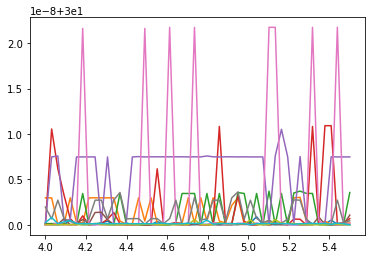

In [74]:
for i in range(Nϵ):
    plt.plot(Kgrid, Kp[:,i])

plt.show



<function matplotlib.pyplot.show(*args, **kw)>

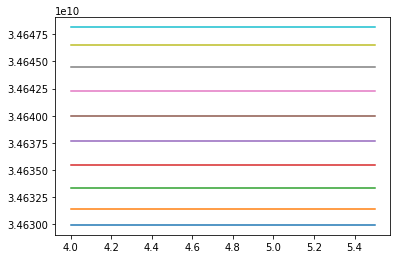

In [75]:
for i in range(Nϵ):
    plt.plot(Kgrid, Vp[:,i])

plt.show

In [ ]:
    for j in range(sizeK):
        print('Grid point number ', j)
        if Kgrid[j] > 0:
            
            for l in range(Nϵ):
                
                print('Random shock number ', l)
                # Make the value function dependent on future K only
                exit_x = lambda x: exitchoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, wrep, r_f, Nϵ, Nrep, cf)
                solve = minimize(exit_x,Kp[j,l])
                Kp_new[j,l] = solve.x
                Vp_new[j,l] = - solve.fun
                
        else:
            
            for l in range(Nϵ):
                
                print('Random shock number ', l)
                # Make the value function dependent on future K only
                exit_x = lambda x: exitchoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, wrep, r_f, Nϵ, Nrep, cf)
                solve = minimize(exit_x,Kp[j,l])
                Kp_new[j,l] = solve.x
                Vp_new[j,l] = - solve.fun
                

In [91]:
def get_ss():
    
    r = (1 / β) - (1 - δ)
    n = Nrep
    k = (r / ((n * ν) * θ)) * (1 / (θ - 1))
    y = (k * θ) * (n * ν)
    i = δ * k
    c = y - i
    w = ν * y / n
    a = w / c
    
    return k, w
K_ss, wrep = get_ss()
print(wrep)

1.2011251758087202


In [92]:
import numpy as np
from scipy.optimize import minimize
from scipy import interpolate
from matplotlib import pyplot as plt
import tauchen

sizeK = 20
tol, epsi, maxiter =1e-8,1, 1000

### State space K
Kmin=0.1
Kmax=8
Kgrid=np.linspace(Kmin,Kmax,sizeK)

### State space epsilon, from Tauchen
[A, P] = tauchen.approx_markov(ρ, σ, m=3, n=Nϵ)  #b is the constant in the AR1 and m is the standard deviation span #b is the constant in the AR1 and m is the standard deviation span
print(A)
# Interpolant to evaluate Value Function
def interpolant(x,Kgrid,Vp):
    t= interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)

# Equation 2 in Pbset: Value of staying in the market
def getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, W, r_f, Nϵ):
    
    exp=np.zeros(Nϵ) # Dimension of exp is dimension of A, number of shocks
    for i in range(Nϵ):
        exp[i] = β * P[l,i]*interpolant(x,Kgrid,Vp[:,i])
        
    FutureVal = np.sum(exp)  
    n_f     = lambda ϵ, k, w: (w / (ν * np.exp(ϵ) * k**θ ))**(1/(ν-1))
    N       = n_f(A[l], Kgrid[j], W)
#     print("N ", N)
    w_f     = lambda ϵ, k, n: ν * np.exp(ϵ) * k**θ * n**(ν-1)
    Y         = prod(A[l], Kgrid[j], N)
#     W         = w_f(A[l], Kgrid, Nrep)
    R         = r_f(A[l], Kgrid[j], N)
    profit    = Π(Y, x, Kgrid[j], N, W)
    V         = profit + FutureVal
    
    return -V




#Equation 1 in Pbset
def exitchoice(Kgrid,Value1, cf):
    # Simple exit payoff
    exitpayoff = (1-δ)*Kgrid
    
    staypayoff = Value1 - cf
#     print("l index = ",l)
    if exitpayoff > staypayoff:
        return exitpayoff, 1
    else:
        return staypayoff, 0




iter= 0
Vp=Kmin*np.ones([sizeK,Nϵ])
Kp=Krep*np.ones([sizeK,Nϵ])
exit =np.zeros([sizeK,Nϵ])
Vp_new=np.zeros([sizeK,Nϵ])
V1=np.zeros([sizeK,Nϵ])
Kp_new=np.zeros([sizeK,Nϵ])

while iter < maxiter:

    for j in range(sizeK):
        print('Grid point number ', j)
        
        for l in range(Nϵ):
#             print('Random shock number ', l)
            # Make the value function dependent on future K only
            #Compute staying in market payoff
            Value1_at_x  = lambda x: getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, wrep, r_f, Nϵ)
            solve = minimize(Value1_at_x,Kp[j,l]) #constraints=cons
            Kp_new[j,l] = solve.x
            V1[j,l] = - solve.fun
            Vp_new[j,l], exit[j,l] = exitchoice(Kgrid[j], V1[j,l], cf)
#             print("exit true", exit[j,l])
            if exit[j,l] == 1:
                Kp_new[j,l] = 0


    epsi = np.sum(np.abs(Kp_new-Kp))
    print("Error term: ", epsi)
    if epsi < tol:
        break
        
    #Update
    Kp=Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

[-0.13764944 -0.10706068 -0.07647191 -0.04588315 -0.01529438  0.01529438
  0.04588315  0.07647191  0.10706068  0.13764944]
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  1873.8835663159396
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid po

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  22958895.80913046
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  158156601.0187971
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  175.74000047147274
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 

Grid point number  1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  3


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  4


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  5


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  6


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  7


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\si

Grid point number  8


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  9


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  10


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  11


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  12


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  13


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  14


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  15


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  16


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  17


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  18


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Grid point number  19


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:391: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:425: RuntimeWarning: invalid value encountered in greater
  if (phi_a1 > phi0 + c1

Error term:  7.086466265152621e+167
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  0.0


<function matplotlib.pyplot.show(*args, **kw)>

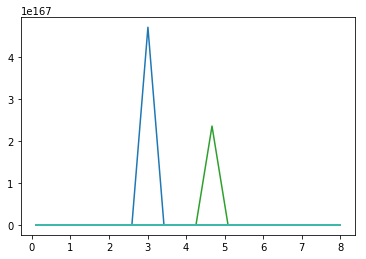

In [93]:
for i in range(Nϵ):
    plt.plot(Kgrid, Kp[:,i])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

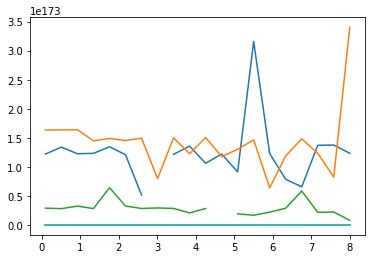

In [94]:
for i in range(Nϵ):
    plt.plot(Kgrid, Vp[:,i])

plt.show